<a href="https://colab.research.google.com/github/Inno732/Data-Mining-Project-Jerome-Inno/blob/main/DataMiningProject_Classification_Inno12/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Data_Mining

/content/drive/MyDrive/Data_Mining


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
X = np.load('./X.npy')
y = np.load('./Y.npy')
img_size =  64

X = X.reshape(len(X), 64*64)  # mise à plat de l'image

In [5]:
#%% equivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y_ = np.zeros(len(y))
for k in range(len(y)):
    a = y[k]
    y_[k] = int(dic_equiv[np.where(a==1)[0][0]])
print(y_)
y_ = y_.astype(int)



[9. 9. 9. ... 5. 5. 5.]


<ipython-input-6-b9a1c12e51f8>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


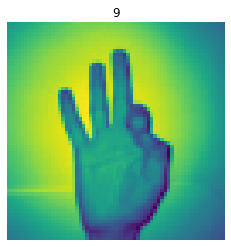

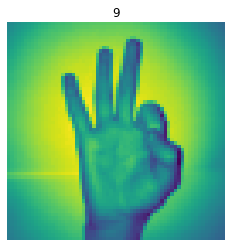

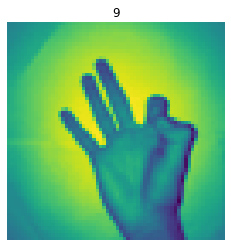

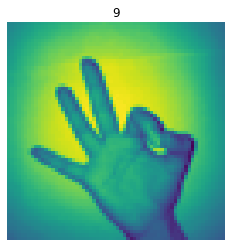

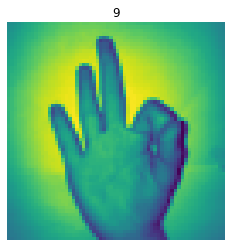

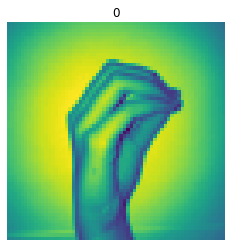

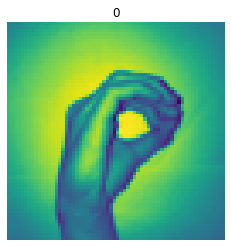

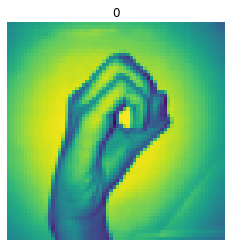

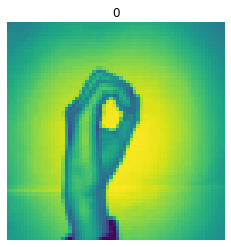

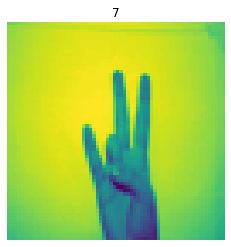

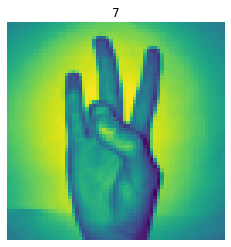

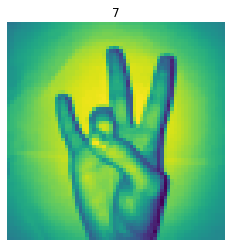

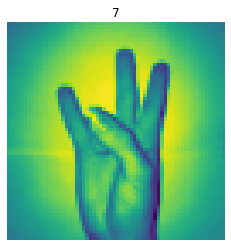

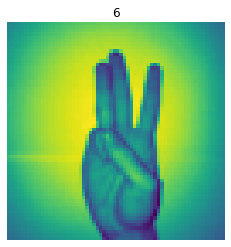

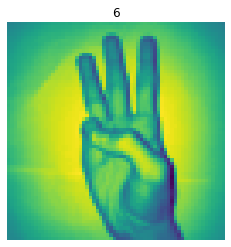

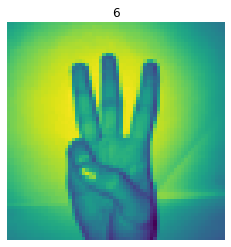

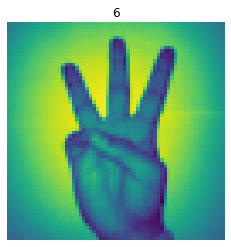

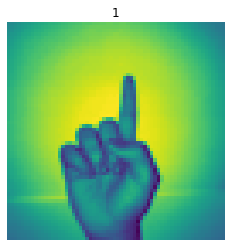

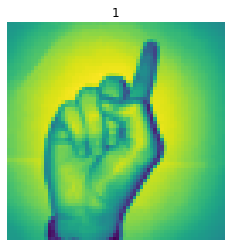

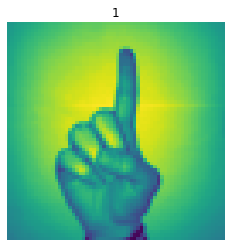

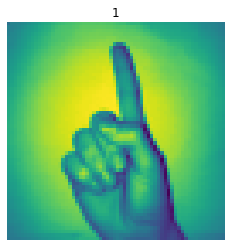

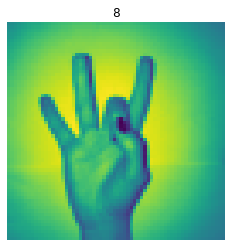

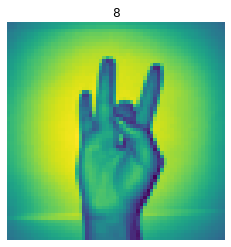

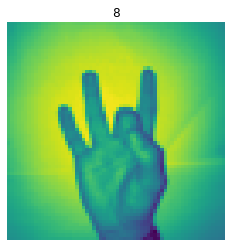

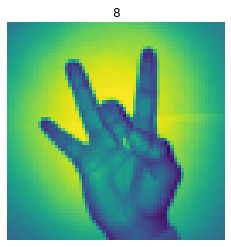

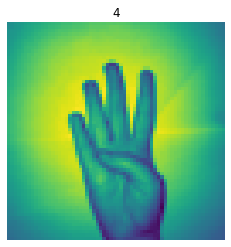

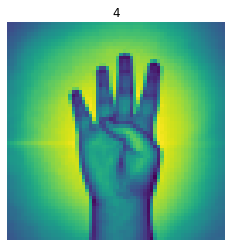

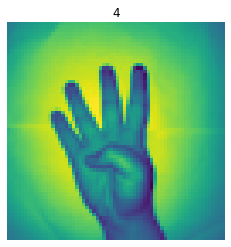

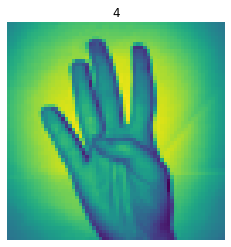

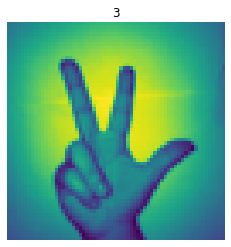

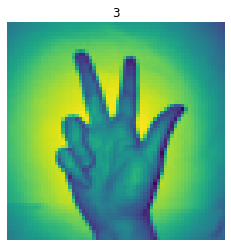

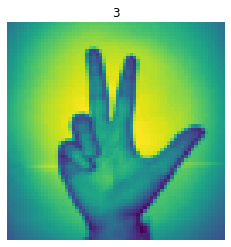

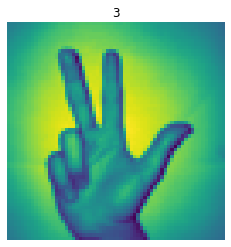

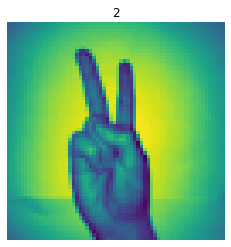

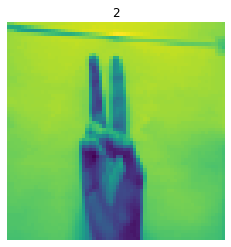

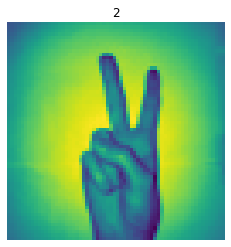

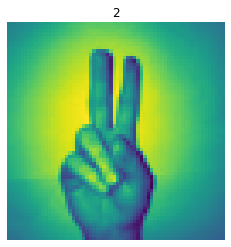

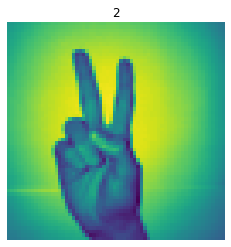

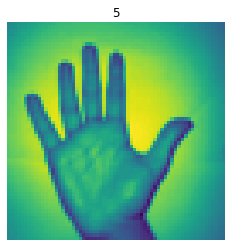

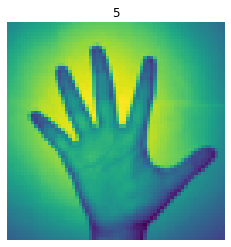

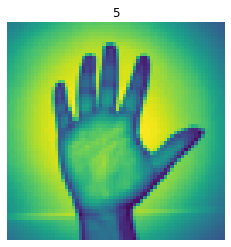

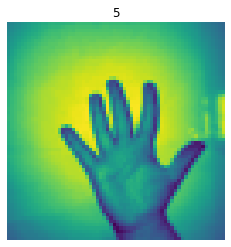

In [6]:
#%% Affichage
for i in range(1, len(y), 50):
    plt.figure()
    plt.imshow(X[i].reshape(img_size, img_size))
    plt.title(y_[i])
    plt.axis('off')


In [8]:
    #%% Creation du dataframe
df = pd.DataFrame(X)
df['Value']=y_
print(df.head)


<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0     0.466667  0.474510  0.478431  0.482353  0.486275  0.490196  0.494118   
1     0.596078  0.607843  0.619608  0.631373  0.643137  0.647059  0.658824   
2     0.588235  0.603922  0.619608  0.631373  0.643137  0.654902  0.666667   
3     0.556863  0.568627  0.584314  0.600000  0.611765  0.619608  0.627451   
4     0.580392  0.576471  0.592157  0.607843  0.615686  0.635294  0.643137   
...        ...       ...       ...       ...       ...       ...       ...   
2057  0.454902  0.466667  0.478431  0.490196  0.505882  0.513726  0.529412   
2058  0.541176  0.556863  0.568627  0.572549  0.588235  0.600000  0.607843   
2059  0.525490  0.545098  0.556863  0.564706  0.572549  0.576471  0.580392   
2060  0.513726  0.525490  0.537255  0.549020  0.560784  0.576471  0.592157   
2061  0.929412  0.937255  0.937255  0.945098  0.941176  0.945098  0.945098   

             7         8         

In [14]:
from sklearn.model_selection import train_test_split

#%% Define training and testing sets
X = df.drop(labels = 'Value', axis=1).values
y = df['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
print("X shape: " , X_train.shape)
print("y shape: " , y_train.shape)
print("X shape: " , X_test.shape)
print("y shape: " , y_test.shape)

X shape:  (1649, 4096)
y shape:  (1649,)
X shape:  (413, 4096)
y shape:  (413,)


#**Regression Logistique**

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=50.0, tol=0.01,
                           penalty="l1",
                           solver="saga")
  
model.fit(X_train, y_train)

LogisticRegression(C=50.0, penalty='l1', solver='saga', tol=0.01)

In [22]:
model.score(X_test,y_test)

0.7796610169491526

In [17]:
pred = model.predict(X_test)
print(classification_report(pred, y_test)) # rapport qui explique tout sur la classification

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        38
           1       0.81      0.71      0.76        42
           2       0.65      0.74      0.70        43
           3       0.81      0.88      0.84        40
           4       0.70      0.74      0.72        38
           5       0.83      0.88      0.85        40
           6       0.78      0.72      0.75        43
           7       0.79      0.71      0.75        52
           8       0.88      0.78      0.82        45
           9       0.76      0.88      0.81        32

    accuracy                           0.78       413
   macro avg       0.78      0.78      0.78       413
weighted avg       0.78      0.78      0.78       413



precision(i) = $\frac{VP(i)}{VP(i) + FP(i)}$\
recall(i) = $\frac{VP(i)}{VP(i) + FN(i)}$\
support(i) = nombre d'individu de la classe i 

Text(69.0, 0.5, 'Truth')

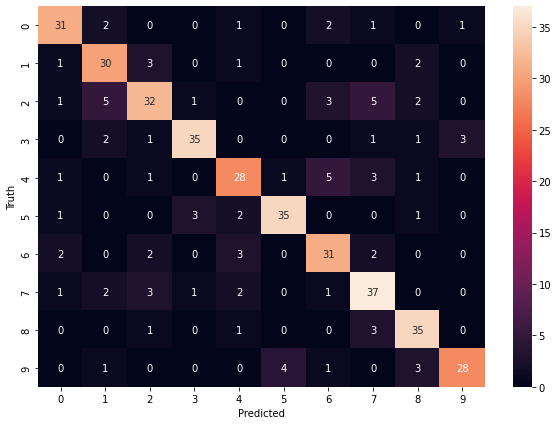

In [20]:
cmrReg = confusion_matrix(y_test, pred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrReg ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


#**Random Forest**

In [40]:
RFC = RandomForestClassifier(min_samples_split=2)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
RFC.score(X_test, y_test)

0.7772397094430993

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
pred_RFC=RFC.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred_RFC)) # rapport qui explique tout sur la classification

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        38
           1       0.82      0.84      0.83        37
           2       0.80      0.71      0.75        49
           3       0.82      0.77      0.80        43
           4       0.65      0.70      0.67        40
           5       0.85      0.69      0.76        42
           6       0.69      0.78      0.73        40
           7       0.80      0.79      0.80        47
           8       0.78      0.80      0.79        40
           9       0.84      0.84      0.84        37

    accuracy                           0.78       413
   macro avg       0.78      0.78      0.78       413
weighted avg       0.78      0.78      0.78       413



precision(i) = $\frac{VP(i)}{VP(i) + FP(i)}$\
recall(i) = $\frac{VP(i)}{VP(i) + FN(i)}$\
support(i) = nombre d'individu de la classe i 

0.7772397094430993

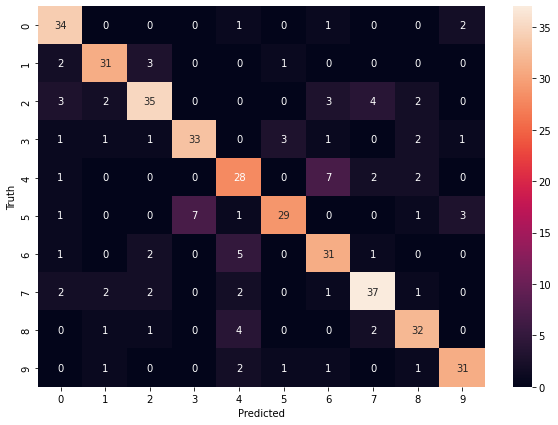

In [43]:
cmrforest = confusion_matrix(y_test, pred_RFC)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**SGD**

In [44]:
# Now let's try SGDclassifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=2000, random_state=42) # Increased max_iter from 1000 to 2000 to avoid max iteration reached limit error
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=2000, random_state=42)

In [45]:
sgd.score(X_train, y_train)

0.6288659793814433

In [46]:
pred_sgd=sgd.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred_RFC))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        38
           1       0.82      0.84      0.83        37
           2       0.80      0.71      0.75        49
           3       0.82      0.77      0.80        43
           4       0.65      0.70      0.67        40
           5       0.85      0.69      0.76        42
           6       0.69      0.78      0.73        40
           7       0.80      0.79      0.80        47
           8       0.78      0.80      0.79        40
           9       0.84      0.84      0.84        37

    accuracy                           0.78       413
   macro avg       0.78      0.78      0.78       413
weighted avg       0.78      0.78      0.78       413



Text(69.0, 0.5, 'Truth')

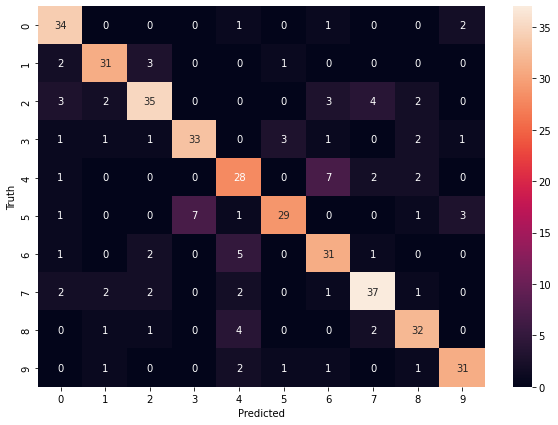

In [47]:
cmrsgd = confusion_matrix(y_test, pred_RFC)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrsgd ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Check the score how well it is performing
sgd.score(X_test, y_test)

0.6634382566585957

#**SVM**

In [ ]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
SVC = SVC(kernel='rbf')

# traininf the model
SVC.fit(X_train, y_train)

SVC()

In [ ]:
SVC.score(X_test, y_test)

0.8523002421307506

In [ ]:
pred_SVC=SVC.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred_SVC)) # rapport qui explique tout sur la classification

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.86      0.94      0.90        47
           2       0.83      0.77      0.80        44
           3       0.97      0.85      0.91        41
           4       0.81      0.66      0.72        38
           5       0.95      0.91      0.93        44
           6       0.82      0.80      0.81        41
           7       0.67      0.82      0.74        40
           8       0.86      0.88      0.87        43
           9       0.88      0.90      0.89        41

    accuracy                           0.85       413
   macro avg       0.86      0.85      0.85       413
weighted avg       0.86      0.85      0.85       413



0.7966101694915254

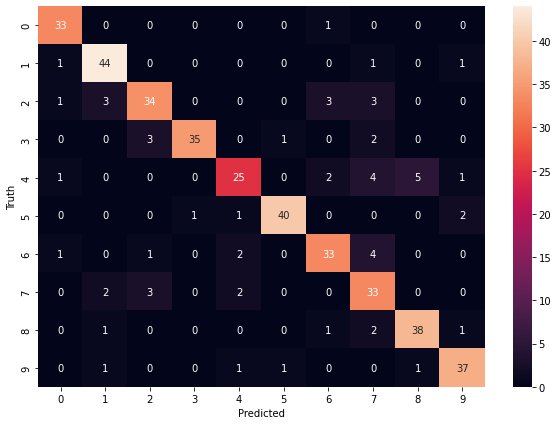

In [ ]:
cmrSVC = confusion_matrix(y_test, pred_SVC)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrSVC ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
RFC.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVC

""""clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))"""
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.8135593220338984

In [ ]:
pred_clf=clf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred_clf)) # rapport qui explique tout sur la classification

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        34
           1       0.82      0.96      0.88        47
           2       0.74      0.80      0.77        44
           3       0.94      0.80      0.87        41
           4       0.59      0.61      0.60        38
           5       0.95      0.91      0.93        44
           6       0.79      0.76      0.77        41
           7       0.81      0.72      0.76        40
           8       0.79      0.79      0.79        43
           9       0.90      0.90      0.90        41

    accuracy                           0.81       413
   macro avg       0.81      0.81      0.81       413
weighted avg       0.82      0.81      0.81       413



0.7966101694915254

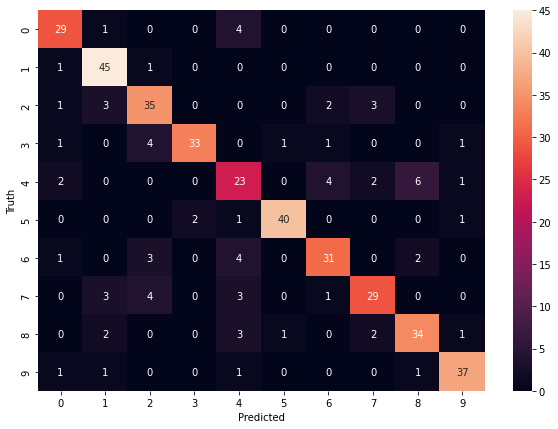

In [ ]:
cmrforest = confusion_matrix(y_test, pred_clf)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
RFC.score(X_test,y_test)

#**Reseau de Neuronnes**

In [ ]:
# verification de la taille et du format des données
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape) 

(1649, 4096)
(1649,)
(413, 4096)
(413,)


In [ ]:
# normalisation des données
x_train=X_train.astype('float64')/255
x_test=X_test.astype('float64')/255

In [ ]:
from keras.utils import np_utils

# convertion des données (labels) vers le format "One-hot-encoding"

nb_classes=10
y_train= np_utils.to_categorical(y_train, nb_classes)
y_test= np_utils.to_categorical(y_test, nb_classes)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

# Model 1 avec une couche cachée de 10 neuronne
model1=Sequential()
model1.add (Dense(10,input_dim=4096))
model1.add(Activation('sigmoid'))

In [ ]:
import tensorflow as tf

# compiler le model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [ ]:
# Entrainer le modèle (80% de données pour l'entrainement et 20% pour la validation)
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=7)

Epoch 1/7
42/42 [==============================] - 1s 11ms/step - loss: 2.5971 - categorical_accuracy: 0.1478 - false_negatives_8: 154.0000 - val_loss: 2.2814 - val_categorical_accuracy: 0.2121 - val_false_negatives_8: 11.0000
Epoch 2/7
42/42 [==============================] - 0s 6ms/step - loss: 2.2487 - categorical_accuracy: 0.2282 - false_negatives_8: 71.0000 - val_loss: 2.1083 - val_categorical_accuracy: 0.2394 - val_false_negatives_8: 3.0000
Epoch 3/7
42/42 [==============================] - 0s 6ms/step - loss: 1.9144 - categorical_accuracy: 0.3374 - false_negatives_8: 4.0000 - val_loss: 1.9201 - val_categorical_accuracy: 0.3212 - val_false_negatives_8: 8.0000
Epoch 4/7
42/42 [==============================] - 0s 5ms/step - loss: 1.7608 - categorical_accuracy: 0.4102 - false_negatives_8: 15.0000 - val_loss: 1.7618 - val_categorical_accuracy: 0.3667 - val_false_negatives_8: 1.0000
Epoch 5/7
42/42 [==============================] - 0s 6ms/step - loss: 1.5786 - categorical_accuracy: 

In [ ]:
# Tester le modele avec les donnees de test
model1.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 1.6442 - categorical_accuracy: 0.4673 - false_negatives_8: 24.0000


[1.6442478895187378, 0.4673123359680176, 24.0]

**Réseau de Neurones 2**


In [ ]:
# plutot bon
model = Sequential()
model.add( Dense(200, kernel_initializer = 'uniform', input_dim=x_train.shape[1], activation='relu'))
model.add( Dense(100, kernel_initializer = 'uniform', input_dim=200, activation='relu'))
model.add( Dense(60, kernel_initializer = 'uniform', input_dim=100, activation='relu'))
model.add( Dense(30, kernel_initializer = 'uniform', input_dim=60, activation='relu'))
model.add( Dense(nb_classes, kernel_initializer = 'uniform', activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)


Epoch 1/100
42/42 [==============================] - 1s 16ms/step - loss: 2.3030 - accuracy: 0.1054 - val_loss: 2.3024 - val_accuracy: 0.1152
Epoch 2/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3021 - accuracy: 0.0970 - val_loss: 2.3006 - val_accuracy: 0.1030
Epoch 3/100
42/42 [==============================] - 1s 12ms/step - loss: 2.2645 - accuracy: 0.1334 - val_loss: 2.1656 - val_accuracy: 0.1576
Epoch 4/100
42/42 [==============================] - 0s 12ms/step - loss: 2.1388 - accuracy: 0.1804 - val_loss: 2.2818 - val_accuracy: 0.1303
Epoch 5/100
42/42 [==============================] - 0s 11ms/step - loss: 2.0823 - accuracy: 0.1903 - val_loss: 2.0815 - val_accuracy: 0.1879
Epoch 6/100
42/42 [==============================] - 0s 12ms/step - loss: 2.0443 - accuracy: 0.2009 - val_loss: 2.0227 - val_accuracy: 0.2182
Epoch 7/100
42/42 [==============================] - 0s 12ms/step - loss: 2.0314 - accuracy: 0.2108 - val_loss: 1.9943 - val_accuracy: 0.2364
Epoch 

Text(0, 0.5, 'loss')

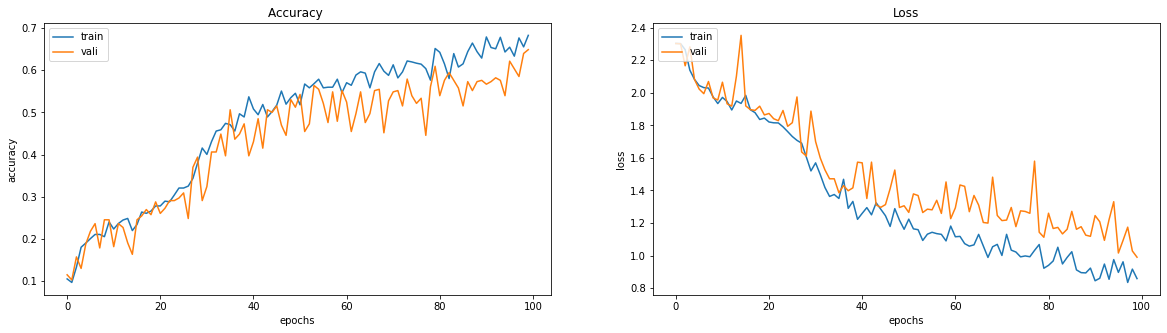

In [ ]:
fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(20,5))


axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].legend(['train', 'vali'], loc='upper left')
axs[0].set_title('Accuracy ')
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")

axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].legend(['train', 'vali'], loc='upper left')
axs[1].set_title('Loss')
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")

In [ ]:
# Tester le modele avec les donnees de test
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 4ms/step - loss: 1.0963 - accuracy: 0.5908


[1.0962550640106201, 0.5907990336418152]